
## Feature Tranformation in machine learning

The objective of Machine learning algorithms (especially like Linear Regression and Gaussian Naive Bayes) to make the given numerical variables have a Gaussian probability distribution.

Your data may not have a Gaussian distribution and instead may have a Gaussian-like distribution (e.g. nearly Gaussian
but with outliers or a skew) or a totally different distribution (e.g. exponential).

As such, you may be able to achieve better performance on a wide range of machine learning algorithms by transforming 
input and/or output variables to have a Gaussian or more Gaussian distribution.

* Many machine learning algorithms prefer or perform better when numerical variables have a Gaussian probability distribution.


* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more Gaussian-like probability distribution.

Many machine learning algorithms perform better when the distribution of variables is Gaussian.

Some algorithms like linear regression and logistic regression explicitly assume the real-valued variables have a Gaussian
distribution. Other nonlinear algorithms may not have this assumption, yet often perform better when variables have a Gaussian distribution.

There are data preparation techniques that can be used to transform each variable to make the distribution Gaussian, or if not Gaussian, then more Gaussian like. These transforms are most effective when the data distribution is nearly-Gaussian to begin with and is addicted with a skew or outliers.

#### Power Transforms

Power transforms refer to a class of techniques that use a power function (like a logarithm or exponent) to make the probability distribution of a variable Gaussian or more Gaussian like.

A power transform will make the probability distribution of a variable more Gaussian. This is often described as removing a skew in the distribution, although more generally is described as stabilizing the variance of the distribution.

The log transform is a specific example of a family of transformations known as power transforms. In statistical terms, these are variance-stabilizing transformations.

We can apply a power transform directly by calculating the log or square root of the variable, although this may or may not be the best power transform for a given variable.

Replacing the data with the log, square root, or inverse may help to remove the skew.

Instead, we can use a generalized version of the transform that finds a parameter (lambda λ) that best transforms a variable to a Gaussian probability distribution. There are two popular approaches for such automatic power transforms; they are:

* Box-Cox Transform
* Yeo-Johnson Transform

The transformed training dataset can then be fed to a machine learning model to learn a predictive modeling task.

statistical methods can be used to empirically identify an appropriate transformation. Box and Cox (1964) propose a family of transformations that are indexed by a parameter, denoted as λ

Below are some common values for lambda:

λ = -1.0 is a reciprocal transform.

λ = 0:5 is a reciprocal square root transform.

λ = 0:0 is a log transform.

λ = 0:5 is a square root transform.

λ = 1:0 is no transform.

In [8]:
# demonstration of the power transform on data with a skew
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

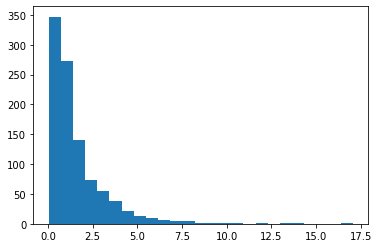

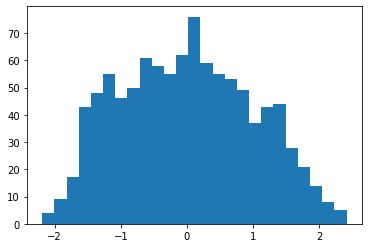

In [47]:
# generate gaussian data sample
data = randn(1000)

# add a skew to the data distribution
data = exp(data)

# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()

# reshape data to have rows and columns
data = data.reshape((len(data),1))

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)

# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

##### Box-Cox Transform

The Box-Cox transformation transforms our data so that it closely resembles a normal distribution. In many statistical techniques, we assume that the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis tests. By transforming your target variable, we can (hopefully) normalize our errors (if they are not already normal).

Additionally, transforming our variables can improve the predictive power of our models because transformations can cut away white noise. Suppose we had a Beta distribution, where alpha equals 1 and beta equals 3. If we plot this distribution, then it might look something like below:


It is a power transform that assumes the values of the input variable to which it is applied are strictly positive. That means 0 and negative values are not supported.



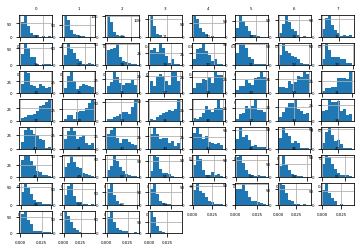

In [82]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

we can see that many variables have a skewed distribution. The dataset provides a good candidate for using a power transform to make the variables more Gaussian.

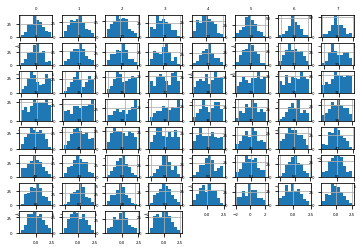

In [75]:
# visualize a box-cox transform of the scaled sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Load dataset
dataset = read_csv('sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

Running the above example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms for each variable looks more Gaussian than the raw data.

#### Yeo-Johnson Transform

Yeo-Johnson Transform does not require the values for each input variable to be strictly positive. It supports zero values and negative values. This means we can apply it to our dataset without scaling it first. We can apply the transform by defining a PowerTransformer object and setting the method argument
to "yeo-johnson" (the default).

In [76]:
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

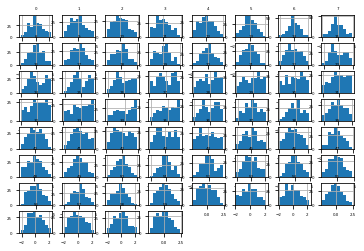

In [79]:
# Load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

We can see that the shape of the histograms for each variable look more Gaussian than the raw
data, much like the Box-Cox transform.

#### Log Transform

It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. 

In this transform, we take the log of the values in a column and use these values as the column instead.

Why does it work? It is because the log function is equipped to deal with large numbers. Here is an example-

log(10) = 1

log(100) = 2, and

log(10000) = 4.

Thus, in our example, while plotting the histogram of Income, it ranges from 0 to 1,20,000. 

Let us see what happens when we apply log on this column:

In [3]:
!pip install seaborn

from seaborn import load_dataset
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.DataFrame({
    'Income': [15000, 1800, 120000, 10000],
    'Age': [25, 18, 42, 51],
    'Department': ['HR','Legal','Marketing','Management'],
    'Balance': [100.0, -263.0, 2000.0, -5.0]
})

# We will execute below snippet before using a new scaler every time.

df_scaled = df.copy()
col_names = ['Income', 'Age', 'Balance']
features = df_scaled[col_names]
features

,Income,Age,Balance
0,15000,25,100.0
1,1800,18,-263.0
2,120000,42,2000.0
3,10000,51,-5.0


In [5]:
df['log_income'] = np.log(df['Income'])
# We created a new column to store the log values
df # Compare income and log_income side by side

,Income,Age,Department,Balance,log_income
0,15000,25,HR,100.0,9.615805
1,1800,18,Legal,-263.0,7.495542
2,120000,42,Marketing,2000.0,11.695247
3,10000,51,Management,-5.0,9.210340


Income column had extreme values ranging from 1800 to 1,20,000 – the log values are now ranging from approximately 7.5 to 11.7! Thus, the log operation had a dual role:

*  Reducing the impact of too-low values
*  Reducing the impact of too-high values.

A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

Let us plot a histogram of the above, using 5 bins:

<AxesSubplot:ylabel='Frequency'>

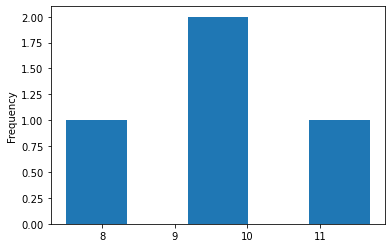

In [6]:
df['log_income'].plot.hist(bins = 5)

#### Quantile Transforms

A quantile transform will map a variable's probability distribution to another probability distribution. A quantile function, also called a percent-point function (PPF), is the inverse of the cumulative probability distribution (CDF). A CDF is a function that returns the probability of a value at or below a given value. The PPF is the inverse of this function and
returns the value at or below a given probability.

The quantile function ranks or smooths out the relationship between observations and can be mapped onto other distributions, such as the uniform or normal distribution. The transformation can be applied to each numeric input variable in the training dataset and then provided as input to a machine learning model to learn a predictive modeling task. This quantile transform
is available in the scikit-learn Python machine learning library via the QuantileTransformer class.

We can demonstrate the QuantileTransformer with a small worked example. We can
generate a sample of random Gaussian numbers and impose a skew on the distribution by
calculating the exponent. The QuantileTransformer can then be used to transform the dataset
to be another distribution, in this case back to a Gaussian distribution. The complete example
is listed below.

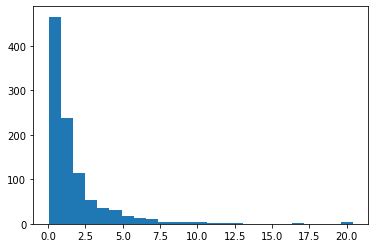

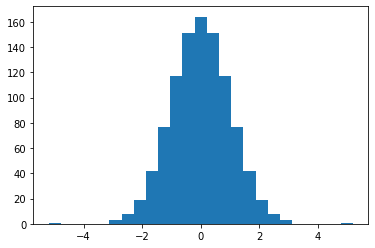

In [83]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()